In [1]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt





# Gerando a nova escala (normalizando os dados)
#scaler = MinMaxScaler(feature_range = (0, 1))
#rescaledX1 = scaler.fit_transform(X1)
#rescaledX2 = scaler.fit_transform(X2)

#import matplotlib.pyplot as plt
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante gerar os gráficos em janela separada
#%matplotlib inline
#teste = pd.DataFrame(rescaledX1)
#teste.hist()
#plt.show()
#rescaledX2

In [2]:
# Carregando os dados
arquivo = 'dados.csv'
colunas = ['Idade', 'Salário']
dados = read_csv(arquivo, names = colunas, sep = ";", skiprows=1)#
idade = dados['Idade'].values
salario = dados['Salário'].values

In [3]:
def equacaoLinear(x, a, b):
    return a * x + b

In [4]:
parametrosIniciais = [1.0 , 1.0]

In [5]:
parametrosOtimizados, pcov = curve_fit(equacaoLinear, idade, salario, parametrosIniciais)

In [6]:
previsao = equacaoLinear(idade, *parametrosOtimizados)

In [7]:
erroAbs = previsao - salario
print(erroAbs)

[ 2141.93448327 -2614.33755006   642.70458328   796.31378328
 -4293.80498339 -2113.56745005  1232.05324995  1193.65094995
  -934.87011672  3949.92298328]


In [8]:
SE = np.square(erroAbs)
MSE = np.mean(SE)
print('SE: ', SE)
print('MSE: ', MSE)

SE:  [ 4587883.33064101  6834760.82563804   413069.18137435   634115.64144357
 18436761.23538558  4467167.3659006   1517955.21070226  1424802.59030848
   873982.13514337 15601891.57382987]
MSE:  5479238.909036714


In [9]:
R2 = 1.0 - (np.var(erroAbs)/np.var(salario))
print('Coeficiente de determinação: ', R2)

Coeficiente de determinação:  0.9846300347582353


In [10]:
coef_ang = parametrosOtimizados[0] 
coef_lin = parametrosOtimizados[1]

print('y = {}x {}'.format(coef_ang, coef_lin) )

y = 1320.5325666669085x -6627.651716729711


Text(0, 0.5, 'Salário Anual (R$)')

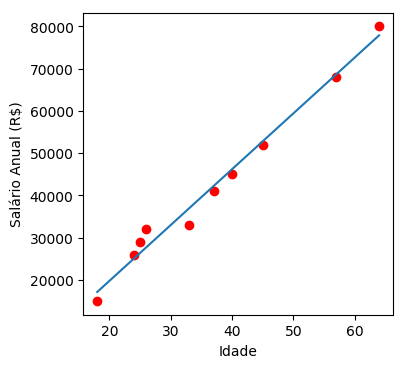

In [15]:
f = plt.figure(figsize=(4, 4), dpi=100)
axes = f.add_subplot(111)
axes.plot(idade, salario, 'ro')

xModel = np.linspace(min(idade), max(idade))
yModel = equacaoLinear(xModel, *parametrosOtimizados)

axes.plot(xModel, yModel)

plt.xlabel("Idade")
plt.ylabel("Salário Anual (R$)")